In [1]:
using Graphs, GraphIO, GraphPlot, NetworkDynamics, OrdinaryDiffEq, Plots,  Printf, EzXML


#f=open("net_celegans_neural.dat")




In [2]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 10)
    #h=  lsmr(Lambda, v)   
       
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [3]:
function calc_troph_incoh(A,h)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [4]:
using SparseArrays


function maj_vote_update(x,g,N)
    
    
    x_old= copy(x)
        for i in 1:N
        
        in_connections= inneighbors(g,i)
        
        sums = 0
        for v in in_connections
        sums= sums + x_old[v]
        end
        
        x[i] = sign(sums + 0.05*x_old[i]) 
    
        #if x[i]==0
            #x[i]= sign(rand() - 0.5)
        #end
        
    end
    
    return x
end



maj_vote_update (generic function with 1 method)

In [118]:
function voter_model_update(x,g,N)
    
    
    x_old= copy(x)
        for i in 1:N
        
        in_connections= inneighbors(g,i)
        
        
        
        if isempty(in_connections)== false
            
            
            
        v = rand(in_connections)
        
        x[i] = x_old[v]
    
        #if x[i]==0
            #x[i]= sign(rand() - 0.5)
        #end
            
            else
            
            #x[i]= sign(rand() - 0.5 )
            x[i]= x_old[i]
        end
    end
    
    return x
end

voter_model_update (generic function with 1 method)

In [119]:
function sis_update(x,g,N,pI,pR)
    
    
    x_new= copy(x)
    
    for i in 1:N
        
        in_connections= inneighbors(g,i)
        
       prob= rand() 
        
        
        if x[i]==1
           
         if pR> prob
                
           #println("Here") 
           x_new[i]= 0
            
            end
            
            
        else
        
        sums = 0
        for v in in_connections
        sums= sums= sums + x[v]
        end
            
          if sums>0
               
            if pI> prob
                
            
           x_new[i]= 1
              #println("Here")   
            end
                
                
            end
            
            
        end
        
        
        
       
        
    end
    
    
    x= copy(x_new)
    
    
    return x
    
end

sis_update (generic function with 1 method)

In [277]:
using LinearAlgebra, OrdinaryDiffEq, Random, GraphIO, ParserCombinator
using Arpack
using SNAPDatasets


number=200



updates=20

#T_list= LinRange(0.025, 8, number)




#T_list= 1.2*ones(number)

B=0

F_list = zeros(0)





time = LinRange(0, updates, updates)



state_list = zeros(0)


#stop = 5

#w_in=1

#net_celegans_neural.dat

#g = loadsnap(:soc_slashdot0902_d)

#g = loadgraph("net_celegans_neural.dat", "SimpleDiGraph", EdgeListFormat())

#g = loadgraph("wiki-Vote.txt", "SimpleDiGraph", EdgeListFormat())



#g = loadgraph("soc-Slashdot0902.txt", "SimpleDiGraph", EdgeListFormat())
#g = loadgraph("network.xml", "graph", GraphMLFormat())
#g= loadgraph("network.xml", "digraph",GraphIO.GraphML.GraphMLFormat())
#g = loadgraph("net_moreno_highschool.dat", "SimpleDiGraph", EdgeListFormat())  
g = loadgraph("net_trade_basic.dat", "SimpleDiGraph", EdgeListFormat())    
#g= erdos_renyi(1000, 10*1000, is_directed=true)    
N=nv(g)    
A = ((adjacency_matrix(g)))    

println("Loaded") 
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A,h)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

    
 
pI = 0.2

pR = 0.1
    

    
#x0 =  zeros(0) 
    
x0= ones(N)
frac= floor(Int,0.05*N)
    
for i in 1:N
        
      append!(x0, (sign(h[i] - frac )) ) 
        
        
    end

sorted = reverse(sortperm(h))    
    

    
    
x0= ones(N)
   
   
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    
x= copy(x0) 




for i in 1:updates
        
     x = voter_model_update(x,g,N)
       
        
      append!(state_list, sum(x))    
        
    end
        
        
        
    
  
    
    
    
println("Done 1 Update")    
 






Loaded
Done 1 Update


In [284]:
using Polynomials, SpecialFunctions




g1= copy(g)

g2=copy(g)

strong_list = zeros(0)

strong_list_rand = zeros(0) 


using LinearAlgebra
using Arpack

N=size(A)[1]
println(N)
diffs= zeros(0)
edge_rem= 0

x_list= zeros(0)
y_list =zeros(0)

for (c,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[c] )
        append!(diffs,d)
        append!(x_list,c)
        append!(y_list,y)
       
    end


L= sum(A)

#println(diffs)

j = (sortperm(diffs))

x_list= floor.(Int,x_list[j])

y_list=  floor.(Int,y_list[j])


arg= - sqrt(-F +1)/(F*(2)) 

erf_function= 0.5*(1 + erf(arg))

beta = erf_function 

rand_j= shuffle(j)



x_list_rand= (x_list[rand_j])

y_list_rand= (y_list[rand_j])

#println(diffs[j])

weak_list= zeros(0)
weak_rand=zeros(0)


L_list=zeros(0)
#for i in 1:(floor(Int,beta*L))
    
for i in 1:(floor(Int,L*0.33))
    #println(i)
    #strong = strongly_connected_components(g1)   
    #append!(strong_list, maximum(size.(strong))[1]/N)
    
    #weak = weakly_connected_components(g1)
    #append!(weak_list, maximum(size.(weak))[1]/N)
    rem_edge!(g1, x_list[i],y_list[i])
    
     #strong_rand = strongly_connected_components(g2)   
    #append!(strong_list_rand, maximum(size.(strong_rand))[1]/N)
    #weak_2 = weakly_connected_components(g2)
    #append!(weak_rand, maximum(size.(weak_2))[1]/N)
    
    rem_edge!(g2, x_list_rand[i],y_list_rand[i])
    
    
    #append!(L_list, i)
end


L_list= L_list/L


x0= ones(N)
   
sorted = (sortperm(h))     
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    
x= copy(x0) 



x= copy(x0) 


state_no_back = zeros(0)

for i in 1:updates
        
     x = voter_model_update(x,g1,N)
       
        
      append!(state_no_back, sum(x))    
        
    end



24


In [285]:
x0= ones(N)
   
sorted = reverse(sortperm(h))     
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    
x= copy(x0) 



x= copy(x0) 


state_no_back_top = zeros(0)

for i in 1:updates
        
     x = voter_model_update(x,g1,N)
       
        
      append!(state_no_back_top, sum(x))    
        
    end

In [286]:
sorted = (sortperm(h))  

state_low = zeros(0)
x0= ones(N)
   
    
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    
x= copy(x0) 




for i in 1:updates
        
     x = voter_model_update(x,g,N)
       
        
      append!(state_low, sum(x))    
        
    end
        

In [287]:
x0= ones(N)

sorted = reverse(sortperm(h))     
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    




x= copy(x0) 


state_random_removed_high = zeros(0)

for i in 1:updates
        
     x = voter_model_update(x,g2,N)
       
        
      append!(state_random_removed_high, sum(x))    
        
    end

In [288]:
x0= ones(N)

sorted = (sortperm(h))     
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    #println(h[sorted[b]])
    end

    
x= copy(x0) 






state_random_removed = zeros(0)

for i in 1:updates
        
     x = voter_model_update(x,g2,N)
       
        
      append!(state_random_removed, sum(x))    
        
    end

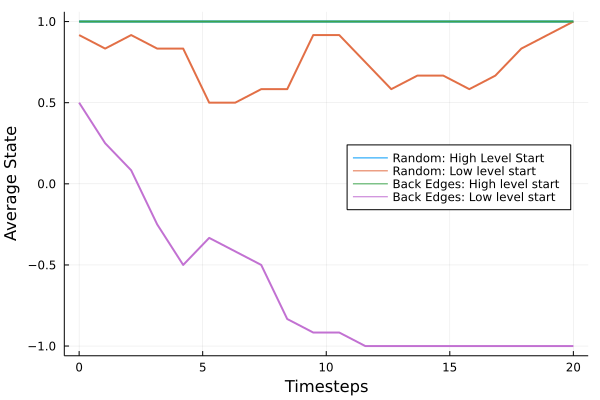

In [297]:
plot(time,state_random_removed_high./N, legend=:right,label="Random: High Level Start",lw=2, ylabel="Average State")

plot!(time,state_random_removed./N, label="Random: Low level start", lw=2)


plot!(time,state_no_back_top./N, label="Back Edges: High level start", lw=2)

plot!(time,state_no_back./N, label="Back Edges: Low level start",lw=2, xlabel="Timesteps")



#savefig("Trade_network_voter_model_time_series.pdf")

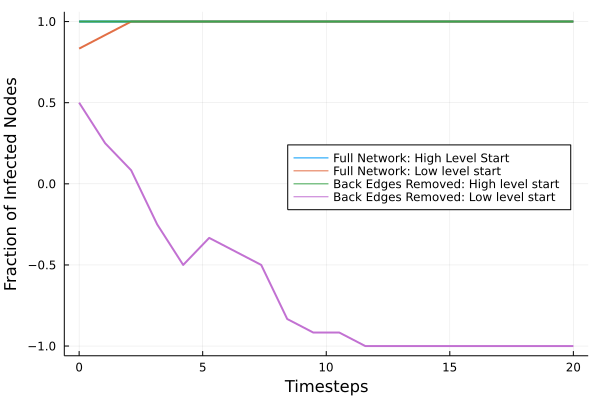

In [290]:
plot(time,state_list./N, legend=:right,label="Full Network: High Level Start",lw=2, ylabel="Fraction of Infected Nodes")

plot!(time,state_low./N, label="Full Network: Low level start", lw=2)


plot!(time,state_no_back_top./N, label="Back Edges Removed: High level start", lw=2)

plot!(time,state_no_back./N, label="Back Edges Removed: Low level start",lw=2, xlabel="Timesteps")






#savefig("SIS_demonstration_2.pdf")

In [158]:
strong = strongly_connected_components(g1)   
maximum(size.(strong))[1]

3

In [159]:
strongly_connected_components(g1)  

1463-element Vector{Vector{Int64}}:
 [155]
 [1]
 [156]
 [157]
 [2]
 [158]
 [159]
 [160]
 [3]
 [161]
 [4]
 [162]
 [163]
 ⋮
 [151]
 [1463]
 [1464]
 [152]
 [1465]
 [153]
 [1466]
 [1467]
 [1468]
 [1469]
 [1470]
 [154]

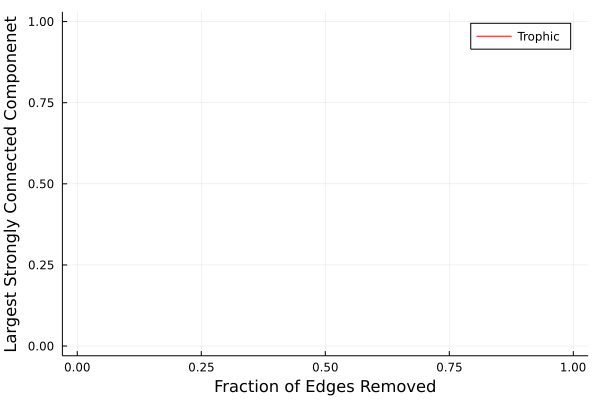

In [17]:
plot(L_list, strong_list, label="Trophic",color="red", xlabel="Fraction of Edges Removed", ylabel="Largest Strongly Connected Componenet")


In [18]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_log_space.pdf")

LoadError: UndefVarError: T_list not defined

In [19]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Spectral Radius", title= "Spectral Radius")


#savefig("Julia_generation_Spec_radius_logspace_2.pdf")

LoadError: UndefVarError: eig_list not defined

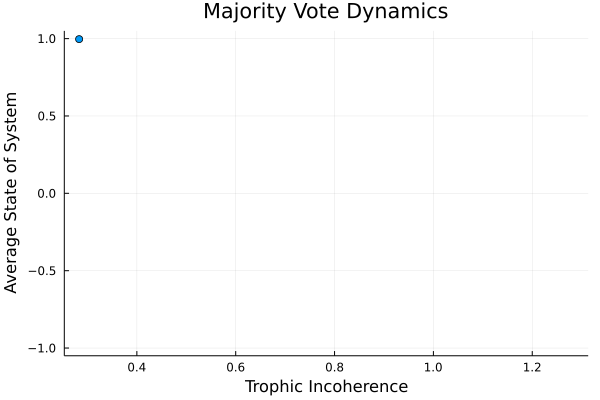

In [20]:
plot(F_list, state_list/N, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Average State of System", title= "Majority Vote Dynamics", ylim=(-1.05,1.05))


#savefig("Majority_Vote_N_500_lowest_5_percent_GRS3.pdf")

In [21]:
plot(F_list, cos.(phase_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", title= "Final Phase when the lowest tenth modified")

#savefig("Kuramoto_0.1_controls_dynamics_2.pdf")

LoadError: UndefVarError: phase_list not defined

In [22]:
plot(eig_list, r_list, seriestype = :scatter, legend = false, xlabel= "Spectral Radius",

ylabel="R Phase Coherence", title= "Oscillator Synchronization Spectral Radius")

LoadError: UndefVarError: eig_list not defined